# Lab Instructions

Create 3 visualizations from text data of your choice.  Each visualization should have at least 1 - 2 sentences explaining both the figure and the interpretation.
You may use any LLM and produce whatever visuals you think best illustrate your data.  

For this assigment I am using the SPAM text message 20170820 - Data.csv dataset from https://www.kaggle.com/datasets/team-ai/spam-text-message-classification . This dataset is a set of text messages with labels indicating 'ham' (real message) or 'spam'(fake scam message).

SPAM DATASET VISUALIZATION PROGRAM
Loading dataset...

Dataset Shape: (5572, 2)

First few rows:
  Category                                            Message
0      ham  Go until jurong point, crazy.. Available only ...
1      ham                      Ok lar... Joking wif u oni...
2     spam  Free entry in 2 a wkly comp to win FA Cup fina...
3      ham  U dun say so early hor... U c already then say...
4      ham  Nah I don't think he goes to usf, he lives aro...

Dataset after cleaning:
Shape: (5572, 2)

Category distribution:
Category
ham     4825
spam     747
Name: count, dtype: int64

Proportions:
Category
ham     0.865937
spam    0.134063
Name: proportion, dtype: float64

Creating Visualization 1: Category Distribution with Message Length Comparison


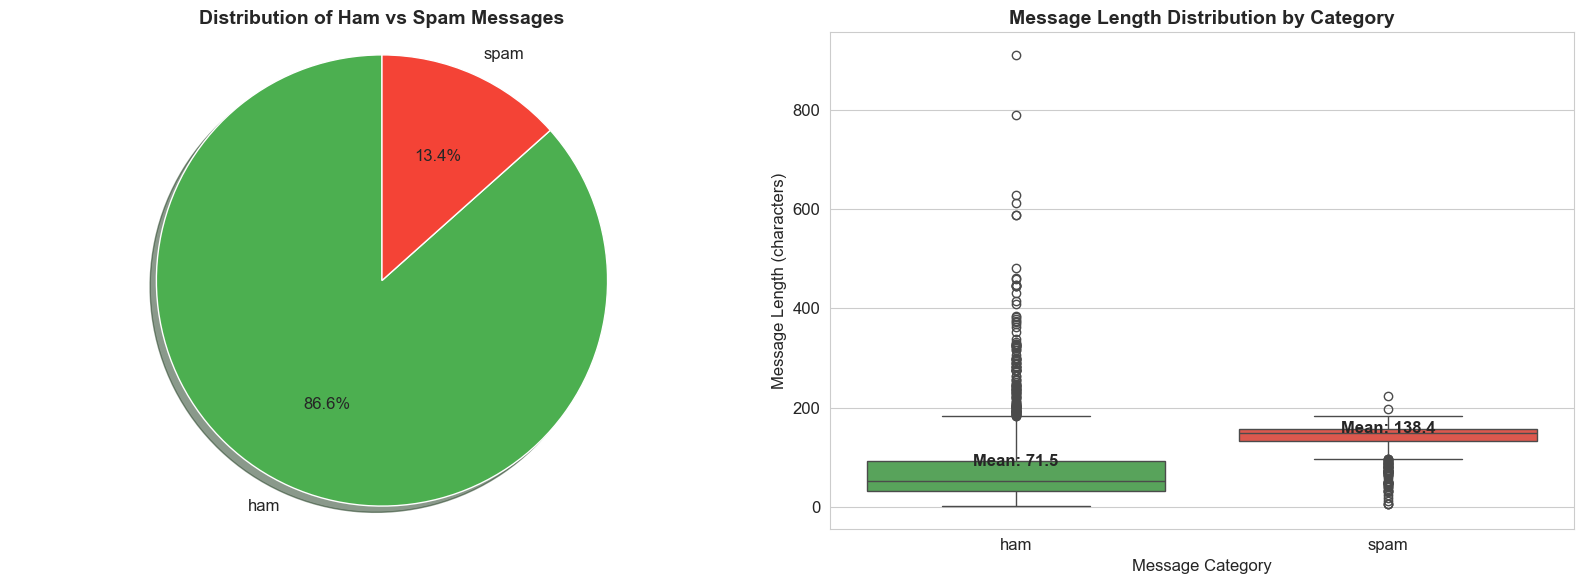


Insights from Visualization 1:
- Ham messages: 4,825 (86.6%)
- Spam messages: 747 (13.4%)
- Average ham message length: 71.5 characters
- Average spam message length: 138.4 characters

Creating Visualization 2: Word Frequency Analysis for Spam vs Ham


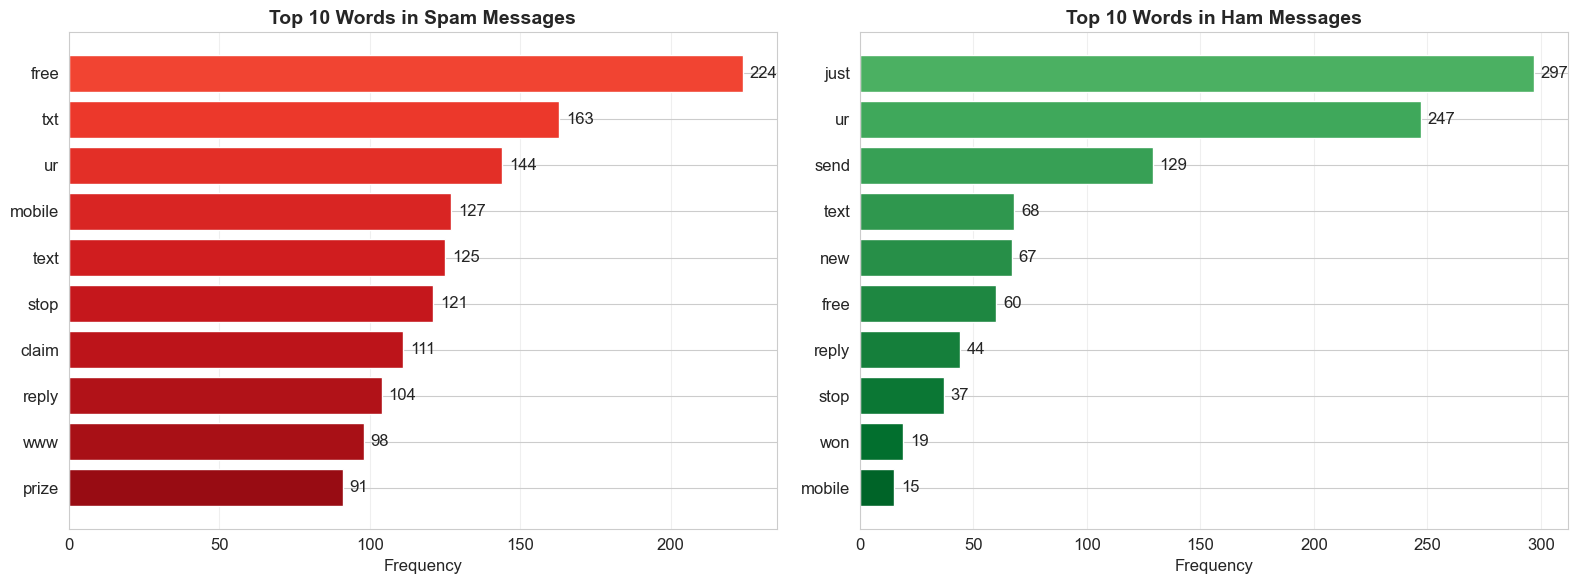


Insights from Visualization 2:
Top spam words: free, txt, ur, mobile, text
Top ham words: just, ur, send, text, new

Creating Visualization 3: Special Character Usage in Spam vs Ham


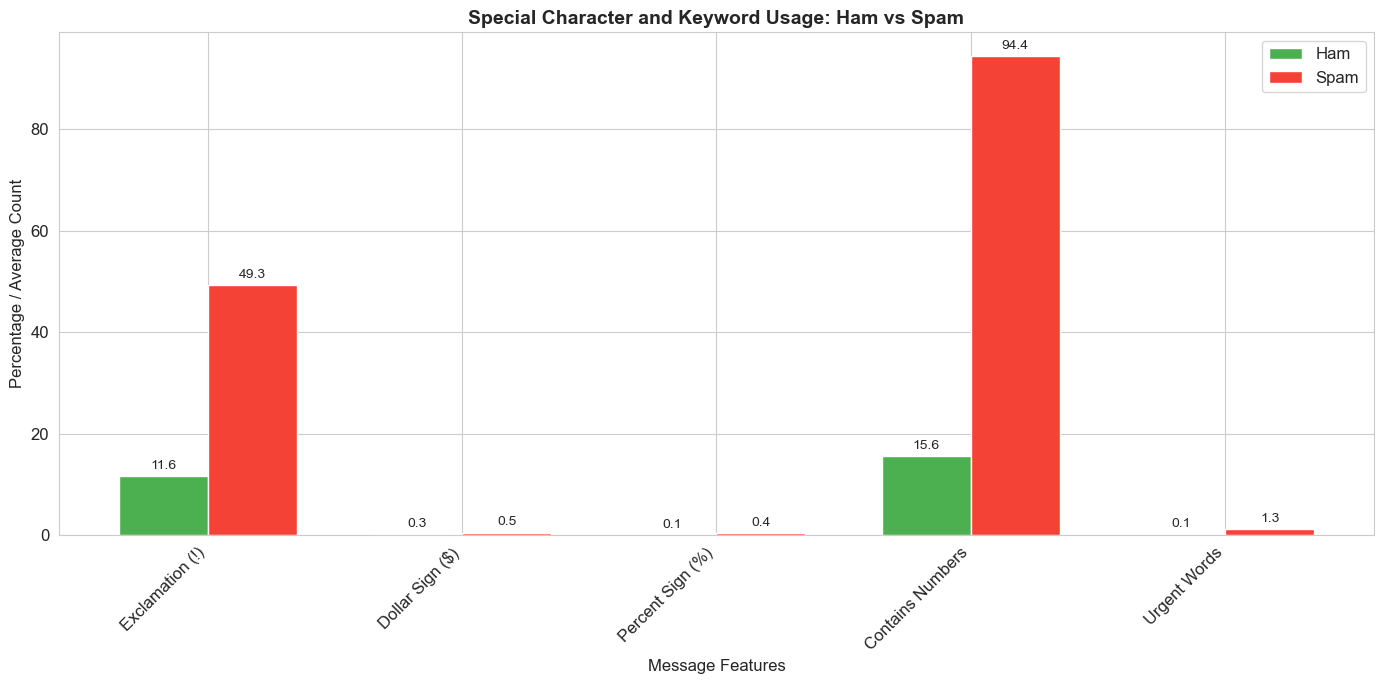


Insights from Visualization 3:
Exclamation (!):
  - Spam: 49.3%
  - Ham: 11.6%
  - Difference: 37.6 percentage points

Dollar Sign ($):
  - Spam: 0.5%
  - Ham: 0.3%
  - Difference: 0.2 percentage points

Percent Sign (%):
  - Spam: 0.4%
  - Ham: 0.1%
  - Difference: 0.3 percentage points

Contains Numbers:
  - Spam: 94.4%
  - Ham: 15.6%
  - Difference: 78.7 percentage points

Urgent Words:
  - Spam: 1.3 words on average
  - Ham: 0.1 words on average


ADDITIONAL INSIGHTS

Message Length Statistics:
                mean        std  min    max
Category                                   
ham        71.524767  58.453847  2.0  910.0
spam      138.432396  30.105608  7.0  224.0

Word Count Statistics:
               mean        std  min    max
Category                                  
ham       14.310259  11.517945  1.0  171.0
spam      23.812584   5.956923  1.0   35.0

Average Message Length by Category:
Category
ham      71.524767
spam    138.432396
Name: Message_Length, dtype: float64

V

In [2]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import CountVectorizer
import warnings
warnings.filterwarnings('ignore')

# Set visual style
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (12, 8)
plt.rcParams['font.size'] = 12

def load_and_explore_data(file_path):
    """
    Load the dataset and perform initial exploration
    """
    print("Loading dataset...")
    df = pd.read_csv(file_path, encoding='latin-1')
    
    # Basic data exploration
    print(f"\nDataset Shape: {df.shape}")
    print(f"\nFirst few rows:")
    print(df.head())
    
    # Check column names and rename for consistency
    # The dataset might have different column names, so let's standardize them
    column_mapping = {}
    for col in df.columns:
        col_lower = col.lower()
        if 'category' in col_lower or 'type' in col_lower or 'label' in col_lower or 'v1' in col_lower:
            column_mapping[col] = 'Category'
        elif 'message' in col_lower or 'text' in col_lower or 'v2' in col_lower:
            column_mapping[col] = 'Message'
    
    if column_mapping:
        df = df.rename(columns=column_mapping)
    
    # Keep only the columns we need
    df = df[['Category', 'Message']].copy()
    
    # Clean category values
    df['Category'] = df['Category'].str.lower().str.strip()
    df['Category'] = df['Category'].replace({
        'ham': 'ham', 
        'spam': 'spam',
        'h': 'ham',
        's': 'spam'
    })
    
    # Remove any rows with missing values
    df = df.dropna()
    
    print(f"\nDataset after cleaning:")
    print(f"Shape: {df.shape}")
    print(f"\nCategory distribution:")
    print(df['Category'].value_counts())
    print(f"\nProportions:")
    print(df['Category'].value_counts(normalize=True))
    
    return df

def add_message_features(df):
    """
    Add derived features from messages for analysis
    """
    # Calculate message length
    df['Message_Length'] = df['Message'].apply(len)
    
    # Calculate word count
    df['Word_Count'] = df['Message'].apply(lambda x: len(str(x).split()))
    
    # Check for special characters
    df['Has_Exclamation'] = df['Message'].apply(lambda x: 1 if '!' in str(x) else 0)
    df['Has_Dollar'] = df['Message'].apply(lambda x: 1 if '$' in str(x) or 'USD' in str(x).upper() else 0)
    df['Has_Percent'] = df['Message'].apply(lambda x: 1 if '%' in str(x) else 0)
    df['Has_Number'] = df['Message'].apply(lambda x: 1 if any(char.isdigit() for char in str(x)) else 0)
    
    # Check for urgent words
    urgent_words = ['urgent', 'free', 'win', 'prize', 'cash', 'claim', 'now', 'limited', 'offer', 'guaranteed']
    df['Urgent_Words_Count'] = df['Message'].apply(
        lambda x: sum(1 for word in urgent_words if word in str(x).lower())
    )
    
    return df

def create_visualization_1(df):
    """
    Visualization 1: Category Distribution with Message Length Comparison
    """
    print("\nCreating Visualization 1: Category Distribution with Message Length Comparison")
    
    fig, axes = plt.subplots(1, 2, figsize=(16, 6))
    
    # Subplot 1: Category distribution pie chart
    category_counts = df['Category'].value_counts()
    colors = ['#4CAF50', '#F44336']  # Green for ham, red for spam
    axes[0].pie(category_counts, labels=category_counts.index, autopct='%1.1f%%', 
                colors=colors, startangle=90, shadow=True)
    axes[0].set_title('Distribution of Ham vs Spam Messages', fontsize=14, fontweight='bold')
    axes[0].axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle
    
    # Subplot 2: Message length distribution by category
    # Using box plot to show distribution of message lengths
    sns.boxplot(x='Category', y='Message_Length', data=df, palette=colors, ax=axes[1])
    axes[1].set_title('Message Length Distribution by Category', fontsize=14, fontweight='bold')
    axes[1].set_xlabel('Message Category')
    axes[1].set_ylabel('Message Length (characters)')
    
    # Add mean value annotations
    ham_mean = df[df['Category'] == 'ham']['Message_Length'].mean()
    spam_mean = df[df['Category'] == 'spam']['Message_Length'].mean()
    axes[1].text(0, ham_mean + 5, f'Mean: {ham_mean:.1f}', ha='center', va='bottom', fontweight='bold')
    axes[1].text(1, spam_mean + 5, f'Mean: {spam_mean:.1f}', ha='center', va='bottom', fontweight='bold')
    
    plt.tight_layout()
    plt.savefig('visualization_1_category_distribution.png', dpi=300, bbox_inches='tight')
    plt.show()
    
    # Print insights
    print(f"\nInsights from Visualization 1:")
    print(f"- Ham messages: {category_counts['ham']:,} ({category_counts['ham']/len(df)*100:.1f}%)")
    print(f"- Spam messages: {category_counts['spam']:,} ({category_counts['spam']/len(df)*100:.1f}%)")
    print(f"- Average ham message length: {ham_mean:.1f} characters")
    print(f"- Average spam message length: {spam_mean:.1f} characters")

def create_visualization_2(df):
    """
    Visualization 2: Word Frequency Analysis for Spam vs Ham
    """
    print("\nCreating Visualization 2: Word Frequency Analysis for Spam vs Ham")
    
    # Separate spam and ham messages
    spam_messages = ' '.join(df[df['Category'] == 'spam']['Message'].astype(str)).lower()
    ham_messages = ' '.join(df[df['Category'] == 'ham']['Message'].astype(str)).lower()
    
    # Get most common words for each category
    vectorizer = CountVectorizer(stop_words='english', max_features=20)
    
    # Fit and transform for spam
    spam_words = vectorizer.fit_transform([spam_messages])
    spam_word_freq = pd.DataFrame({
        'Word': vectorizer.get_feature_names_out(),
        'Frequency': spam_words.toarray()[0]
    }).sort_values('Frequency', ascending=False).head(10)
    
    # Fit and transform for ham (using the same vectorizer vocabulary for consistency)
    ham_words = vectorizer.transform([ham_messages])
    ham_word_freq = pd.DataFrame({
        'Word': vectorizer.get_feature_names_out(),
        'Frequency': ham_words.toarray()[0]
    }).sort_values('Frequency', ascending=False).head(10)
    
    fig, axes = plt.subplots(1, 2, figsize=(16, 6))
    
    # Subplot 1: Top words in spam messages
    colors_spam = plt.cm.Reds(np.linspace(0.6, 0.9, len(spam_word_freq)))
    axes[0].barh(spam_word_freq['Word'], spam_word_freq['Frequency'], color=colors_spam)
    axes[0].invert_yaxis()  # Highest frequency at the top
    axes[0].set_xlabel('Frequency')
    axes[0].set_title('Top 10 Words in Spam Messages', fontsize=14, fontweight='bold')
    axes[0].grid(axis='x', alpha=0.3)
    
    # Add frequency labels
    for i, (freq, word) in enumerate(zip(spam_word_freq['Frequency'], spam_word_freq['Word'])):
        axes[0].text(freq + max(spam_word_freq['Frequency'])*0.01, i, str(freq), va='center')
    
    # Subplot 2: Top words in ham messages
    colors_ham = plt.cm.Greens(np.linspace(0.6, 0.9, len(ham_word_freq)))
    axes[1].barh(ham_word_freq['Word'], ham_word_freq['Frequency'], color=colors_ham)
    axes[1].invert_yaxis()
    axes[1].set_xlabel('Frequency')
    axes[1].set_title('Top 10 Words in Ham Messages', fontsize=14, fontweight='bold')
    axes[1].grid(axis='x', alpha=0.3)
    
    # Add frequency labels
    for i, (freq, word) in enumerate(zip(ham_word_freq['Frequency'], ham_word_freq['Word'])):
        axes[1].text(freq + max(ham_word_freq['Frequency'])*0.01, i, str(freq), va='center')
    
    plt.tight_layout()
    plt.savefig('visualization_2_word_frequency.png', dpi=300, bbox_inches='tight')
    plt.show()
    
    # Print insights
    print(f"\nInsights from Visualization 2:")
    print(f"Top spam words: {', '.join(spam_word_freq['Word'].head(5).tolist())}")
    print(f"Top ham words: {', '.join(ham_word_freq['Word'].head(5).tolist())}")

def create_visualization_3(df):
    """
    Visualization 3: Special Character Usage in Spam vs Ham
    """
    print("\nCreating Visualization 3: Special Character Usage in Spam vs Ham")
    
    # Calculate percentage of messages with special features by category
    features = ['Has_Exclamation', 'Has_Dollar', 'Has_Percent', 'Has_Number', 'Urgent_Words_Count']
    feature_names = ['Exclamation (!)', 'Dollar Sign ($)', 'Percent Sign (%)', 'Contains Numbers', 'Urgent Words']
    
    # Calculate percentages for spam and ham
    spam_percentages = []
    ham_percentages = []
    
    for feature in features:
        if feature != 'Urgent_Words_Count':
            spam_percent = df[df['Category'] == 'spam'][feature].mean() * 100
            ham_percent = df[df['Category'] == 'ham'][feature].mean() * 100
        else:
            # For urgent words, calculate average count
            spam_percent = df[df['Category'] == 'spam'][feature].mean()
            ham_percent = df[df['Category'] == 'ham'][feature].mean()
        
        spam_percentages.append(spam_percent)
        ham_percentages.append(ham_percent)
    
    # Create a grouped bar chart
    x = np.arange(len(feature_names))
    width = 0.35
    
    fig, ax = plt.subplots(figsize=(14, 7))
    rects1 = ax.bar(x - width/2, ham_percentages, width, label='Ham', color='#4CAF50')
    rects2 = ax.bar(x + width/2, spam_percentages, width, label='Spam', color='#F44336')
    
    ax.set_xlabel('Message Features')
    if 'Urgent_Words_Count' in features:
        ax.set_ylabel('Percentage / Average Count')
    else:
        ax.set_ylabel('Percentage of Messages (%)')
    ax.set_title('Special Character and Keyword Usage: Ham vs Spam', fontsize=14, fontweight='bold')
    ax.set_xticks(x)
    ax.set_xticklabels(feature_names, rotation=45, ha='right')
    ax.legend()
    
    # Add value labels on top of bars
    def autolabel(rects):
        for rect in rects:
            height = rect.get_height()
            ax.annotate(f'{height:.1f}',
                       xy=(rect.get_x() + rect.get_width() / 2, height),
                       xytext=(0, 3),  # 3 points vertical offset
                       textcoords="offset points",
                       ha='center', va='bottom', fontsize=10)
    
    autolabel(rects1)
    autolabel(rects2)
    
    plt.tight_layout()
    plt.savefig('visualization_3_special_characters.png', dpi=300, bbox_inches='tight')
    plt.show()
    
    # Print insights
    print(f"\nInsights from Visualization 3:")
    for i, feature in enumerate(feature_names):
        print(f"{feature}:")
        print(f"  - Spam: {spam_percentages[i]:.1f}{'%' if 'Urgent' not in feature else ' words on average'}")
        print(f"  - Ham: {ham_percentages[i]:.1f}{'%' if 'Urgent' not in feature else ' words on average'}")
        if feature != 'Urgent Words':
            difference = spam_percentages[i] - ham_percentages[i]
            print(f"  - Difference: {difference:.1f} percentage points")
        print()

def main():
    """
    Main function to run the SPAM dataset visualization program
    """
    print("=" * 70)
    print("SPAM DATASET VISUALIZATION PROGRAM")
    print("=" * 70)
    
    # Try to load the dataset (adjust path if needed)
    file_path = 'SPAM.csv'
    
    try:
        # Load and explore data
        df = load_and_explore_data(file_path)
        
        # Add derived features
        df = add_message_features(df)
        
        # Create visualizations
        create_visualization_1(df)
        create_visualization_2(df)
        create_visualization_3(df)
        
        # Additional summary statistics
        print("\n" + "=" * 70)
        print("ADDITIONAL INSIGHTS")
        print("=" * 70)
        
        # Message length statistics
        print("\nMessage Length Statistics:")
        print(df.groupby('Category')['Message_Length'].describe()[['mean', 'std', 'min', 'max']])
        
        # Word count statistics
        print("\nWord Count Statistics:")
        print(df.groupby('Category')['Word_Count'].describe()[['mean', 'std', 'min', 'max']])
        
        # Correlation between message length and spam likelihood
        print("\nAverage Message Length by Category:")
        print(df.groupby('Category')['Message_Length'].mean())
        
        print("\nVisualizations have been saved as PNG files:")
        print("1. visualization_1_category_distribution.png")
        print("2. visualization_2_word_frequency.png")
        print("3. visualization_3_special_characters.png")
        
    except FileNotFoundError:
        print(f"\nError: File '{file_path}' not found.")
        print("Please ensure the SPAM.csv file is in the same directory as this script.")
        print("Alternatively, update the 'file_path' variable in the main() function.")
    except Exception as e:
        print(f"\nAn error occurred: {e}")
        print("Please check your dataset format and try again.")

if __name__ == "__main__":
    main()

Figure 1 is a pie chart showing the proportion of ham(real) to spam(fake) messages along with a box plot showing average message length for ham vs spam messages. From this we see that most of the messages in this dataset are ham with only 13.4% being spam. Additionally we see that the average(mean) message length(number of characters) for spam messages is far longer at 138.4 comparted to ham messages at 71.5.

Figure 2 are frequency analysis comparing the top 10 most common words in spam vs ham messages. From these visualizations we see that the word 'free' is far more likely to appear in spam messages and 'just' is far more likely to appear in ham messages.

Figure 3 is a barchart comparing the usage of special characters in spam vs ham messages. This visualizations show us that spam messages are far more likely to use exclamation marks and numbers.